<a href="https://colab.research.google.com/github/yvishyst/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
#Downloading data from the website
col_names = ['party','handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution','physician_fee_freeze',
             'el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras',
             'mx_missile','immigration','synfuels_corporation_cutback','education_spending',
             'superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa']
voting_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",names=col_names)
print(voting_data.shape)

#Replacing Categoricals values with numbers
voting_data=voting_data.replace({'?':np.nan,'y':1,'n':0})
#Checking for Null values
#Observation : the nulls don't match with the one given on UCI website, I have rechecked the data on UCI seems to be incorrect.

# Creating Samples based on Parties
republics = voting_data[voting_data.party=='republican']
democrats = voting_data[voting_data.party=='democrat']

print("Republics :",republics.shape)
print("Democrat :",democrats.shape)
voting_data.head()

(435, 17)
Republics : (168, 17)
Democrat : (267, 17)


,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


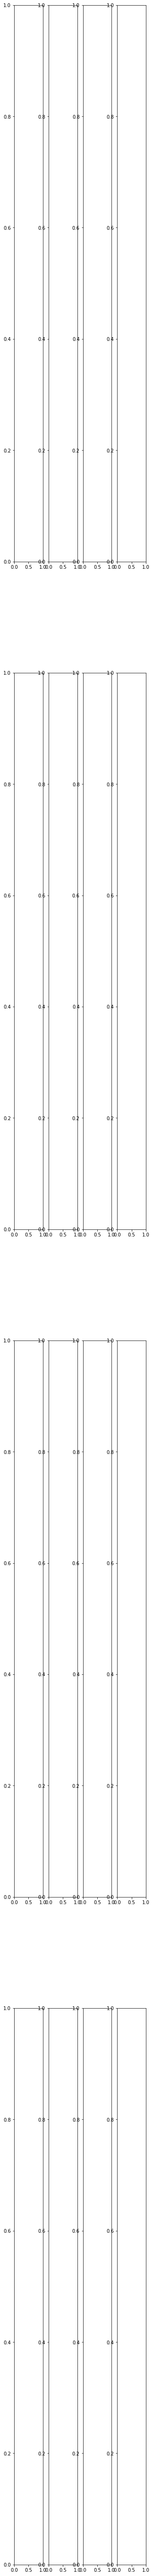

In [5]:
fig = plt.figure(figsize=(5,100))
nrow =1
ax = fig.subplots(4,4)

In [7]:
ax[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dbfc089e8>,
      dtype=object)

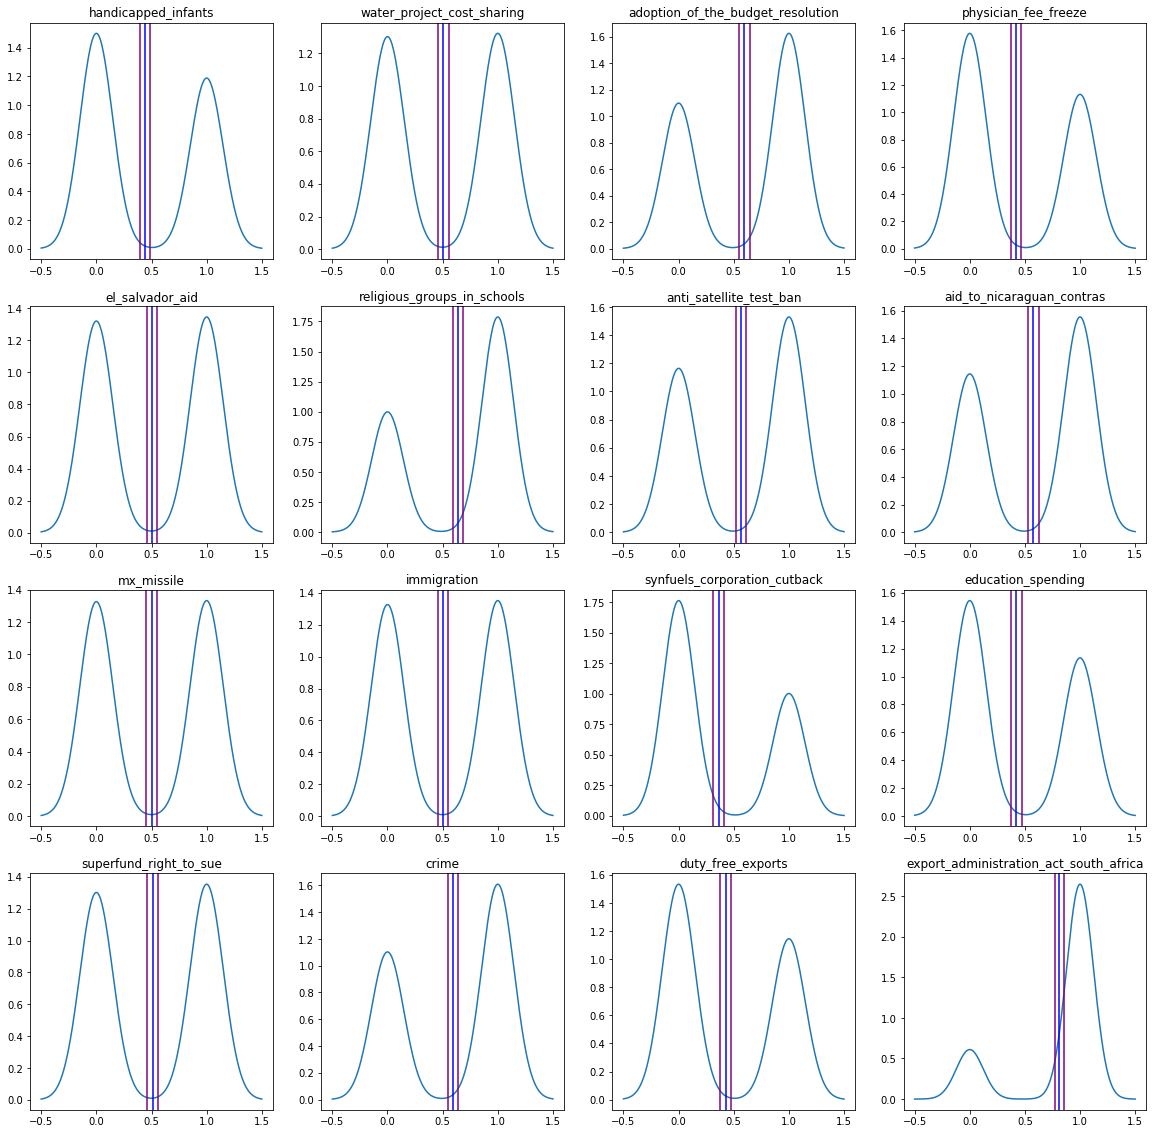

In [14]:
#Generating confidence interval for each of the Vote
confidence_interval = 0.95
fig = plt.figure(figsize=(20,20))
nrow =0
ncol =0
ax = fig.subplots(4,4)
for col_name in voting_data.columns:
  if(col_name!='party'):
    sample_vote = voting_data[~voting_data[col_name].isnull()][col_name]
    size_sample = len(sample_vote)
    mean_sample = sample_vote.mean()
    std_sample = np.std(sample_vote.values,ddof=1)
    standard_error = std_sample/np.sqrt(size_sample)
    margin_error = standard_error*sc.stats.t.ppf((1+confidence_interval)/2,size_sample-1)
    #print("Sample size: ",size_sample,"\nSample mean: ",mean_sample,"\nSample Std Dev: ",std_sample,"\nStandard error: ",standard_error,"\nMargin of error: ",margin_error)
    sample_vote.plot(kind='kde',ax=ax[nrow,ncol])
    ax[nrow,ncol].axvline(x=mean_sample,color='blue')
    ax[nrow,ncol].axvline(x=(mean_sample-margin_error),color='purple')
    ax[nrow,ncol].axvline(x=(mean_sample+margin_error),color='purple')
    ax[nrow,ncol].set_title(col_name)
    ax[nrow,ncol].set_ylabel("")
    if(ncol==3):
      ncol=0
      nrow +=1
    else:
      ncol +=1
  fig

In [0]:
#Calculating chi squared test
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()
df['education'].value_counts()

(32561, 15)


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [0]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
#Calculating chi square for workingclass against education
working_education = pd.crosstab(df['workclass'],df['education'],margins=True)
nrows,ncols = working_education.shape
working_education

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
workclass,,,,,,,,,,,,,,,,,
Federal-gov,6,9,5,0,1,2,3,55,38,212,16,263,67,0,29,254,960
Local-gov,31,36,19,4,9,28,23,88,86,477,27,503,342,4,29,387,2093
Never-worked,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2,7
Private,695,923,333,136,266,424,387,729,1005,3551,181,7780,894,41,257,5094,22696
Self-emp-inc,19,14,7,2,4,14,10,35,38,273,35,279,79,0,81,226,1116
Self-emp-not-inc,67,60,19,13,19,94,34,71,108,399,50,866,124,0,131,486,2541
State-gov,13,14,10,1,4,10,6,41,46,270,89,268,169,1,31,325,1298
Without-pay,0,0,0,0,0,1,0,1,0,0,0,9,0,0,0,3,14
All,833,1057,393,156,303,574,463,1020,1321,5182,398,9969,1675,46,558,6777,30725


In [0]:
#Calculating chisquare using numpy
observed_values = working_education.values[:nrows-1,:ncols-1]
total_values = working_education.values[-1,-1]
row_totals = working_education.values[:-1,-1]
col_totals = working_education.values[-1,:-1]
expected_values = np.outer(row_totals,col_totals)/total_values
chisquare_value = ((observed_values-expected_values)**2/expected_values).sum()
chisquare_value

2247.5388548117335

In [0]:
#calculating chisquare using stat function
sc.stats.chi2_contingency(observed_values)

(2247.5388548117335,
 0.0,
 105,
 array([[2.60270138e+01, 3.30258747e+01, 1.22792514e+01, 4.87420667e+00,
         9.46720911e+00, 1.79345810e+01, 1.44663954e+01, 3.18698129e+01,
         4.12745321e+01, 1.61911147e+02, 1.24354760e+01, 3.11480553e+02,
         5.23352319e+01, 1.43726607e+00, 1.74346623e+01, 2.11746786e+02],
        [5.67443124e+01, 7.20032872e+01, 2.67713263e+01, 1.06267860e+01,
         2.06404882e+01, 3.91011229e+01, 3.15397559e+01, 6.94828316e+01,
         8.99870789e+01, 3.53000033e+02, 2.71119284e+01, 6.79092498e+02,
         1.14101709e+02, 3.13353946e+00, 3.80111961e+01, 4.61652107e+02],
        [1.89780309e-01, 2.40813670e-01, 8.95362083e-02, 3.55410903e-02,
         6.90317331e-02, 1.30772986e-01, 1.05484133e-01, 2.32384052e-01,
         3.00960130e-01, 1.18060212e+00, 9.06753458e-02, 2.27121237e+00,
         3.81611066e-01, 1.04800651e-02, 1.27127746e-01, 1.54398698e+00],
        [6.15321985e+02, 7.80786721e+02, 2.90301969e+02, 1.15234369e+02,
         2.2382

In [0]:
#chisqare value of 2247 and p value of 0, i reject the null hypothesis that education and working class are independent of each other.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)